In [42]:
import os
os.system('pip install -U -r requirements.txt')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from scipy.stats import norm


In [43]:
np.random.seed(2)
x0 = np.random.normal(0,1,(100,1))
x1 = np.random.normal(2,1,(10000,1))

y0  = np.zeros((100,1))
y1  = np.ones((10000,1))

x = np.concatenate((x0,x1), axis=0)
y = np.concatenate((y0,y1), axis=0)


In [44]:
sgd_clf = SGDClassifier()
sgd_clf.fit(x, y.ravel())


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

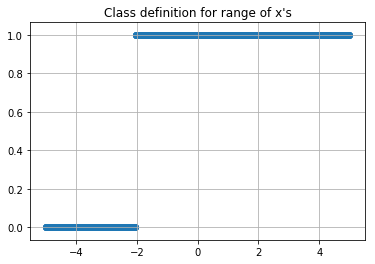

(None, None)

In [45]:
x_new = np.arange(-5,5,0.01)
y_predict = [sgd_clf.predict([[x_n]]) for x_n in x_new]

plt.scatter(x_new, y_predict), plt.title("Class definition for range of x's")
plt.grid(), plt.show()


In [48]:
mu0, std0 = norm.fit(x0)
mu1, std1 = norm.fit(x1)

x_new_instance            = -2
likelihood_of_class0      = norm.pdf(x_new_instance, mu0, std0)
likelihood_of_class1      = norm.pdf(x_new_instance, mu1, std1)
print(likelihood_of_class0, likelihood_of_class1)

(0.07228926170273062, 0.0001423009001763983)


In [53]:

tot             = 10000+100
prior_of_class0 = 100/tot
prior_of_class1 = 10000/tot
print('Bayesian probability of ' + str(x_new_instance)+ ' being in class 0')
print(prior_of_class0*likelihood_of_class0/(prior_of_class0*likelihood_of_class0 + prior_of_class1*likelihood_of_class1))


Bayesian probability of -2 being in class 0
0.8355270845806692
